In [31]:
%matplotlib inline

from typing import Tuple

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

## Load the data to use

In [32]:
data = pd.read_csv("data/nn_1_node.csv")
data

,x1,x2,x3,y
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,1,0,0,1
5,1,0,1,1
6,1,1,0,1
7,1,1,1,1


In [33]:
data_array = np.array(data)
X = data_array[:,:3].transpose()
X

array([[0, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 1, 0, 1]], dtype=int64)

In [34]:
y = data_array[:,-1]
y

array([0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

## Create useful functions

In [35]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [36]:
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [37]:
def loss_function(y, x):
    return 0.5 * ((y - x) ** 2)

In [38]:
def loss_prime(y, x):
    return - (y - x)

## Create Neural Network

In [42]:
class FullyConnected():
    def __init__(self, inputs: int, neurons: int):
        self.inputs = inputs
        self.neurons = neurons
        
        self.weights = None
        self.bias = None
        self.create_weights()
        
        self.weighted_sum = None
        self.Z = None
        self.A = None
        
        self.dA = None
        self.dZ_dW = None
        self.dZ_dB = None
        
    def create_weights(self):
        self.weights = np.random.randn(self.neurons, self.inputs)
        self.bias = np.zeros(self.neurons)
        
    def print_values(self):
        print("W = {} - Shape = {}".format(self.weights, self.weights.shape))
        print("B = {} - Shape = {}".format(self.bias, self.bias.shape))
        
    def forward_pass(self, inputs, print_values=False):
        self.weighted_sum = np.dot(self.weights, inputs)
        self.Z = self.weighted_sum + self.bias
        self.A = sigmoid(self.Z)
        
        if print_values:
            print("Weighted Sum = {} - Shape = {}".format(self.weighted_sum, self.weighted_sum.shape))
            print("Z = {} - Shape = {}".format(self.Z, self.Z.shape))
            print("A = {} - Shape = {}".format(self.A, self.A.shape))
        
        return self.A
    
    def backward_pass(self, inputs, real_values, print_values=False):
        
        if self.A is None:
            raise ValueError("Please perform a forward pass before a backward pass.")
        
        self.dA = loss_prime(real_values, self.A) * sigmoid_prime(self.Z)
        self.dZ_dW = self.dA * inputs
        self.dZ_dB = self.dA * 1
            
        if print_values:
            print("dA = {} - Shape = {}".format(self.dA, self.dA.shape))
            print("dZ_dW = {} - Shape = {}".format(self.dZ_dW, self.dZ_dW.shape))
            print("dZ_dB = {} - Shape = {}".format(self.dZ_dB, self.dZ_dB.shape))
            
    def update_parameters(self, learning_rate=0.05, print_values=False):
        
        if self.dA is None or self.dZ_dW is None or self.dZ_dB is None:
            raise ValueError("Please perform a backward pass before updating the weights.")
    
        self.delta_W = (-1) * learning_rate * np.sum(self.dZ_dW) / len(self.dZ_dW)
        self.delta_B = (-1) * learning_rate * np.sum(self.dZ_dB) / len(self.dZ_dB)
        
        if print_values:
            print("delta_W = {} - Shape = {}".format(self.delta_W, self.delta_W.shape))
            print("delta_B = {} - Shape = {}".format(self.delta_B, self.delta_B.shape))
            
        self.weights = self.weights + self.delta_W
        self.bias = self.bias + self.delta_B
        
        if print_values:
            print("W = {} - Shape = {}".format(self.weights, self.weights.shape))
            print("B = {} - Shape = {}".format(self.bias, self.bias.shape))
    
    def train(self, epochs, learning_rate, inputs, real_values, plot_cost=True):
        
        cost = []
        for i in range(epochs):
            self.forward_pass(inputs=inputs)
            self.backward_pass(inputs=inputs, real_values=real_values)
            
            cost.append(np.sum(loss_function(real_values, self.A)) / len(self.A[0]))
            
            self.update_parameters(learning_rate=learning_rate)
            
        if plot_cost:
            plt.plot(range(epochs), cost)

In [65]:
np.random.seed(0)
fully_connected_1 = FullyConnected(inputs=3, neurons=1)
fully_connected_1.print_values()

W = [[1.76405235 0.40015721 0.97873798]] - Shape = (1, 3)
B = [0.] - Shape = (1,)


In [66]:
output = fully_connected_1.forward_pass(inputs=X, print_values=True)

Weighted Sum = [[0.         0.97873798 0.40015721 1.37889519 1.76405235 2.74279033
  2.16420955 3.14294754]] - Shape = (1, 8)
Z = [[0.         0.97873798 0.40015721 1.37889519 1.76405235 2.74279033
  2.16420955 3.14294754]] - Shape = (1, 8)
A = [[0.5        0.72685773 0.59872543 0.7988135  0.85371646 0.93950488
  0.89698916 0.95862993]] - Shape = (1, 8)


In [12]:
loss = loss_function(y, output)
loss

array([[0.125     , 0.26416108, 0.17923607, 0.31905151, 0.01069944,
        0.00182983, 0.00530562, 0.00085574]])

In [13]:
fully_connected_1.backward_pass(inputs=X, real_values=y, print_values=True)

dA = [[ 0.125       0.14430711  0.14384575  0.12837771 -0.01826857 -0.00343827
  -0.00951816 -0.00164068]] - Shape = (1, 8)
dZ_dW = [[ 0.          0.          0.          0.         -0.01826857 -0.00343827
  -0.00951816 -0.00164068]
 [ 0.          0.          0.14384575  0.12837771 -0.         -0.
  -0.00951816 -0.00164068]
 [ 0.          0.14430711  0.          0.12837771 -0.         -0.00343827
  -0.         -0.00164068]] - Shape = (3, 8)
dZ_dB = [[ 0.125       0.14430711  0.14384575  0.12837771 -0.01826857 -0.00343827
  -0.00951816 -0.00164068]] - Shape = (1, 8)


In [14]:
fully_connected_1.update_parameters(learning_rate=0.01, print_values=True)

delta_W = -0.001652682743544944 - Shape = ()
delta_B = -0.005086648991831403 - Shape = ()
W = [[1.76239966 0.39850453 0.9770853 ]] - Shape = (1, 3)
B = [-0.00508665] - Shape = (1,)


W = [[ 2.2408932   1.86755799 -0.97727788]] - Shape = (1, 3)
B = [0.] - Shape = (1,)


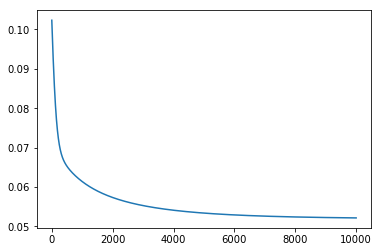

In [15]:
fully_connected_1 = FullyConnected(inputs=3, neurons=1)
fully_connected_1.print_values()
fully_connected_1.train(epochs=10000, learning_rate=0.01, inputs=X, real_values=y, plot_cost=True)

In [16]:
fully_connected_1.print_values()

W = [[ 3.10616174  2.73282653 -0.11200934]] - Shape = (1, 3)
B = [-2.8455084] - Shape = (1,)


In [17]:
final_output = fully_connected_1.forward_pass(inputs=X, print_values=True)
final_output

Weighted Sum = [[ 0.         -0.11200934  2.73282653  2.6208172   3.10616174  2.9941524
   5.83898828  5.72697894]] - Shape = (1, 8)
Z = [[-2.8455084  -2.95751774 -0.11268187 -0.2246912   0.26065334  0.14864401
   2.99347988  2.88147054]] - Shape = (1, 8)
A = [[0.05491396 0.0493824  0.4718593  0.44406234 0.56479689 0.53709273
  0.9522787  0.94692282]] - Shape = (1, 8)


array([[0.05491396, 0.0493824 , 0.4718593 , 0.44406234, 0.56479689,
        0.53709273, 0.9522787 , 0.94692282]])

W = [[1.76405235 0.40015721 0.97873798]] - Shape = (1, 3)
B = [0.] - Shape = (1,)
W = [[1.76405235 0.40015721 0.97873798]] - Shape = (1, 3)
B = [0.] - Shape = (1,)
W = [[1.76405235 0.40015721 0.97873798]] - Shape = (1, 3)
B = [0.] - Shape = (1,)


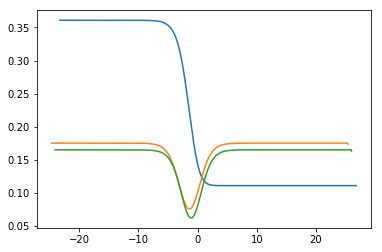

In [78]:
np.random.seed(0)
fully_connected_1 = FullyConnected(inputs=3, neurons=1)
for i in range(len(fully_connected_1.weights[0])):

    np.random.seed(0)
    fully_connected_1 = FullyConnected(inputs=3, neurons=1)
    fully_connected_1.print_values()

    w_range = 50
    w_points = 1000
    w_min = fully_connected_1.weights[0][i] - w_range / 2
    w_max = fully_connected_1.weights[0][i] + w_range / 2
    w_values = []
    loss_values = []
    for j in range(w_points):
        w_values.append(w_min + w_range * j / w_points)
        fully_connected_1.weights[0][i] = w_min + w_range * j / w_points
        output = fully_connected_1.forward_pass(inputs=X)
        loss = loss_function(y, output)
        loss_values.append(np.sum(loss) / len(output[0]))

    w_values.append(w_max)
    fully_connected_1.weights[0][0] = w_max
    output = fully_connected_1.forward_pass(inputs=X)
    loss = loss_function(y, output)
    loss_values.append(np.sum(loss) / len(output[0]))
    plt.plot(w_values, loss_values)
